# Dataset Terapi

### Load Data

In [51]:
#importing library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [52]:
#load csv
df = pd.read_csv('https://raw.githubusercontent.com/Bryant35/Data_Mining/main/ALP/Bryant%20Anthony%20Thauwrisan_ALP_0706022010008/Dataset_Terapi_Kelenjar_Getah_Bening.csv')
df


,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


### EDA

#### Data Check

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 87 non-null     float64
 3   Number_of_Warts      89 non-null     float64
 4   Type                 85 non-null     float64
 5   Area                 90 non-null     int64  
 6   induration_diameter  88 non-null     float64
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [54]:
df.isnull().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

### Normalization #1

In [55]:
df = df.interpolate(method = 'pad')
df

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,6.0,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,1.0,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


In [56]:
df.isnull().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

In [57]:
df.duplicated().sum()

0

### Dealing with Imbalance Class

In [58]:
print(df['Result_of_Treatment'].value_counts())

1    71
0    19
Name: Result_of_Treatment, dtype: int64


In [59]:
#dependent variable and independent variable
X = df[['Result_of_Treatment']] == 0
y = df[['Result_of_Treatment']] == 1

In [60]:
#remapping
X = X.replace({True: 1, False: 0})
y = y.replace({True: 1, False: 0})

In [61]:
standard_sc = StandardScaler()
standard = pd.DataFrame(standard_sc.fit_transform(X),columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [62]:
# SMOTE Oversampling
from imblearn.over_sampling import SMOTE
Count = Counter(y_train)
print(Count)
smt = SMOTE()
X_train_res, y_train_res = smt.fit_resample(X_train, y_train.values.ravel())
  
Counter2 = Counter(y_train_res)
print(Counter2)

Counter({'Result_of_Treatment': 1})
Counter({1: 52, 0: 52})


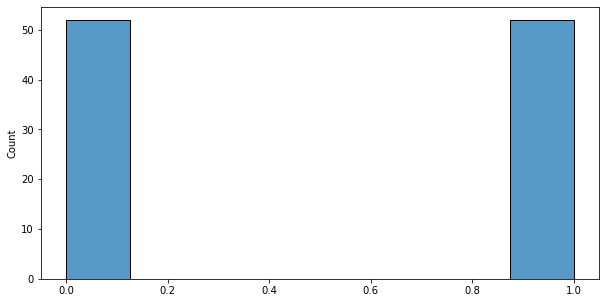

In [63]:
fig = plt.figure(figsize=(10, 5))
sns.histplot(data=y_train_res)
plt.show()

## Classification

### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = 0)
log.fit(X_train, y_train.values.ravel())

LogisticRegression(random_state=0)

In [65]:
y_pred = log.predict(X_test)
print(y_pred)

[1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1]


In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion = confusion_matrix(y_pred, y_test)
print(confusion)
print("Accuracy Score :")
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred,normalize=False))

[[ 8  0]
 [ 0 19]]
Accuracy Score :
1.0
27


### KNN Classifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier

log = KNeighborsClassifier(metric='euclidean')
log.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [68]:
y_pred = log.predict(X_test)
print(y_pred)

[1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1]


In [69]:
confusion = confusion_matrix(y_pred, y_test)
print(confusion)
print("Accuracy Score :")
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred,normalize=False))

[[ 8  0]
 [ 0 19]]
Accuracy Score :
1.0
27


### Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

In [71]:
NB.fit(X_train,y_train)

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [72]:
y_pred = NB.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score :")
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred,normalize=False))

Confusion Matrix
 [[ 8  0]
 [ 0 19]]
Accuracy Score :
1.0
27


## Clustering

In [73]:
# set the parameter for evaluating K
SSE = []
# check the inertia for each K
K = range(1,11)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df)
 SSE.append(kmeans.inertia_)

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

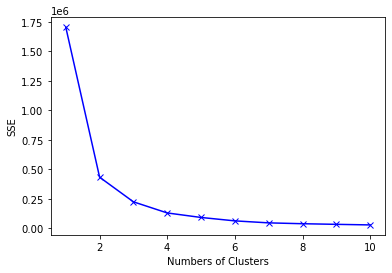

In [74]:
plt.plot(K, SSE,'bx-')
plt.xlabel('Numbers of Clusters') 
plt.ylabel('SSE') 
plt.show()

In [75]:
k = KneeLocator(range(1,11), SSE, curve='convex', direction='decreasing')
print('Elbow/Knee: ', k.elbow)

Elbow/Knee:  3
